In [34]:
# Initial imports
import numpy as np
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats

In [35]:
df= pd.read_csv('fifa_cleaned.csv')
df.count
df

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,24/06/87,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,14/02/92,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,15/03/93,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,04/06/91,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,20/06/91,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,204322,R. McKenzie,Rory McKenzie,07/10/93,25,175.26,74.8,"RM,CAM,CM",Scotland,67,...,53+2,52+2,52+2,52+2,53+2,50+2,46+2,46+2,46+2,50+2
17950,239762,M. Sipľak,Michal Sipľak,02/02/96,23,182.88,79.8,LB,Slovakia,59,...,57+2,55+2,55+2,55+2,57+2,57+2,58+2,58+2,58+2,57+2
17951,235155,J. Bekkema,Jan Bekkema,09/04/96,22,185.42,89.8,GK,Netherlands,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17952,244883,A. Al Yami,Abdulrahman Al Yami,19/06/97,21,175.26,64.9,"ST,LM",Saudi Arabia,59,...,41+2,35+2,35+2,35+2,41+2,39+2,32+2,32+2,32+2,39+2


In [36]:
df.dtypes

id             int64
name          object
full_name     object
birth_date    object
age            int64
               ...  
LB            object
LCB           object
CB            object
RCB           object
RB            object
Length: 92, dtype: object

In [37]:
df1 =df[['value_euro','dribbling', 'id']]
df1

,value_euro,dribbling,id
0,110500000.0,97,158023
1,69500000.0,84,190460
2,73000000.0,87,195864
3,62000000.0,90,198219
4,60000000.0,69,201024
...,...,...,...
17949,975000.0,64,204322
17950,190000.0,52,239762
17951,170000.0,12,235155
17952,280000.0,57,244883


In [38]:
df1.dropna()
df1

,value_euro,dribbling,id
0,110500000.0,97,158023
1,69500000.0,84,190460
2,73000000.0,87,195864
3,62000000.0,90,198219
4,60000000.0,69,201024
...,...,...,...
17949,975000.0,64,204322
17950,190000.0,52,239762
17951,170000.0,12,235155
17952,280000.0,57,244883


In [39]:
df1['value_euro'] = df1['value_euro'].fillna(0) 
df1['value_euro']=df1['value_euro'].astype(int)
df1.dtypes

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


value_euro    int32
dribbling     int64
id            int64
dtype: object

In [40]:
df1.isnull().sum()
n= df1.count()

In [41]:
n

value_euro    17954
dribbling     17954
id            17954
dtype: int64

In [42]:
x = df1[['dribbling']]
X = np.array([x])
X

array([[[97],
        [84],
        [87],
        ...,
        [12],
        [57],
        [58]]], dtype=int64)

In [43]:
y = df1[ df['value_euro']]
Y= np.array([y])

KeyError: "None of [Float64Index([110500000.0,  69500000.0,  73000000.0,  62000000.0,  60000000.0,\n               59500000.0,  81000000.0,  64500000.0,  38000000.0,  60000000.0,\n              ...\n               77000000.0,   1400000.0,    825000.0,    725000.0,    900000.0,\n                 975000.0,    190000.0,    170000.0,    280000.0,    325000.0],\n             dtype='float64', length=17954)] are in the [columns]"

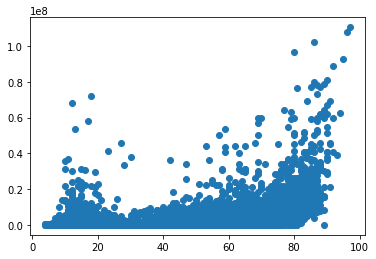

In [14]:
plt.scatter(x, y)
plt.show()

In [15]:
df.columns

Index(['id', 'name', 'full_name', 'birth_date', 'age', 'height_cm',
       'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'work_rate', 'body_type', 'release_clause_euro', 'club_team',
       'club_rating', 'club_position', 'club_jersey_number', 'club_join_date',
       'contract_end_year', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
  

In [16]:
plt.figure(figsize=(10,10))
loc=player_list.Position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("club_position")
plt.ylabel("")
plt.show()

NameError: name 'player_list' is not defined

<Figure size 720x720 with 0 Axes>

In [30]:

x_test = X
y_test = Y
x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)


In [31]:
model = LinearRegression()
model.fit(x_test, y_test)
y_pred = model.predict(x_test)
print(f'beta 0: { model.intercept_}\n')
print(f'beta 1: { model.coef_}\n')


NameError: name 'LinearRegression' is not defined

In [32]:
y_pred= model.predict(x_test)
print(y_pred.shape)

NameError: name 'model' is not defined